In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('C:/Users/lucyf/Coding/Homelessness-reasons/data/master_df.csv')

In [11]:
X = df['total_prevention_duty'].values.reshape(-1, 1)
y = df['total_successful_prevention']

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

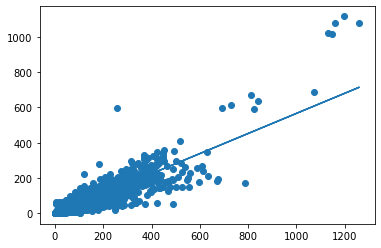

In [12]:
plt.scatter(X, y)
plt.plot(X, y_pred)
plt.show()

In [16]:
print(model.predict(np.array(250).reshape(1, -1)))

[139.0471804]
